#Problem Statement

Regork Inc. is seeking to enhance its sales and customer satisfaction by gaining a comprehensive understanding of the purchasing behavior of married individuals within various age groups. The primary objective of this data analysis project is to identify buying patterns among this demographic and formulate personalized recommendations and marketing strategies tailored to each age group. By performing a thorough data analysis, we aim to empower Regork to boost sales effectively and cater to the diverse preferences of its customer base.
The Regork CEO should be highly interested in this problem statement and the accompanying data analysis for several compelling reasons:
Sales Growth: The data analysis project aims to uncover insights into the buying behavior of married individuals across different age groups. This information will provide actionable strategies for boosting sales. Increased sales directly contribute to revenue growth, which is a fundamental goal for any business, including Regork.
Customer Satisfaction: By tailoring marketing strategies and product offerings based on the preferences of specific age groups, Regork can enhance customer satisfaction. Satisfied customers are more likely to become repeat buyers and brand advocates, leading to long-term profitability.
Adaptation to Changing Trends: Consumer preferences evolve over time. By continuously analyzing data, Regork can stay ahead of changing trends and adapt its strategies accordingly, ensuring long-term relevance and success.
In addressing our business challenge, we have undertaken a comprehensive analysis of the purchasing behaviour exhibited by a specific demographic segment, namely, married individuals.
Our principal objective is to discern patterns and preferences within this group, particularly focusing on different age cohorts. By doing so, we aim to pinpoint frequently purchased products among married individuals of varying age groups and, in turn, identify product combinations that can significantly enhance sales.
To achieve this, we intend to implement a tailored recommendation system that offers personalized suggestions to customers, further augmenting sales opportunities for frequently bought items.
From our analysis we propose following recommendations:
Product Combos: Tailored product combinations that align with the preferences of specific age groups. For instance, combining Soft Drinks with Bags of Chips for the 19 - 24 age group.
Marketing Strategies: Strategies aimed at effectively promoting these combos, including discounts and promotional campaigns, to attract and engage customers.
Strategic Marketing Timing: To further optimize sales, we have identified specific days of the week when these product combos should be strategically marketed to maximize customer footfall and purchasing behavior. For example, we recommend marketing these combos on Mondays for several age groups.
Data Sources
Our analysis hinges on three primary data sources:
Transaction Data Exploration: We delve into transactional data to identify purchasing patterns among married individuals. This step allows us to uncover which products are more likely to be bought by this segment.
Demographics Data Review: By examining demographic attributes, we gain insights into the distribution of married individuals across different age groups. This segmentation helps us understand variations in buying behaviour based on age.
Product Data Overview: An understanding of our product catalog is essential. We assess which items are available and frequently purchased, forming the basis for our analysis.
Throughout the following sections of this report, we will present our findings, including visualizations and insights, to guide our subsequent analysis and decision-making processes.


In [1]:
#Libraries utilized for data analysis
import pandas as pd
import pandas as pd
from completejourney_py import get_data
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar
import seaborn as sns

In [2]:
# get_data() provides a dictionary of several DataFrames
cj_data = get_data()
cj_data.keys()

transactions = cj_data['transactions']
demographics = cj_data['demographics']
products = cj_data['products']
campaigns = cj_data['campaigns']
campaign_descriptions = cj_data['campaign_descriptions']
promotions = cj_data['promotions']

Here’s an explanation of the use of each of these libraries:
The completejourney package provides access to data sets characterizing household level transactions over one year from a group of 2,469 households who are frequent shoppers at a grocery store. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are captured.


Exploratory Data Analysis
In this section, we employ a range of data visualizations to shed light on the critical aspects of our business problem. Our primary focus is on understanding the buying behaviour of a specific demographic segment—married individuals.
To enable a comprehensive analysis of our business problem, we undertake a process of data integration, bringing together essential information from multiple sources. Specifically, we integrate the transactions data and the demographics data by performing an inner join on the shared key ‘household id.’ This step allows us to associate transactional information with various households.
Subsequently, we conduct another inner join, this time on the key ‘product id,’ incorporating the product data into our integrated dataset. This meticulous data integration process results in the creation of our master data frame, which serves as the foundation for our analytical endeavours.

In [3]:
new_df1 = (
    transactions
    .merge(demographics, how = "inner", on = "household_id")
    .merge(products, how = "inner", on = "product_id")
)

new_df1 = new_df1[new_df1['marital_status'] == 'Married']

new_df1 = (
    new_df1
    .groupby(['basket_id', 'product_category'])
    .agg(Total_sales = ('sales_value', 'sum'))
    .reset_index()
)

Initial Analysis: Identifying the “Most Purchased Product” Across Age Groups
In the preliminary stages of our analysis, a key point of interest is to determine the product that emerges as the “Most Purchased Product” within each age group. This analysis is pivotal in understanding which products hold the highest appeal across the entire demographic spectrum.
Our approach involves leveraging the master data frame, which amalgamates transactional, demographic, and product information. By utilizing this comprehensive dataset, we identify the product with the highest sales within each distinct age group.


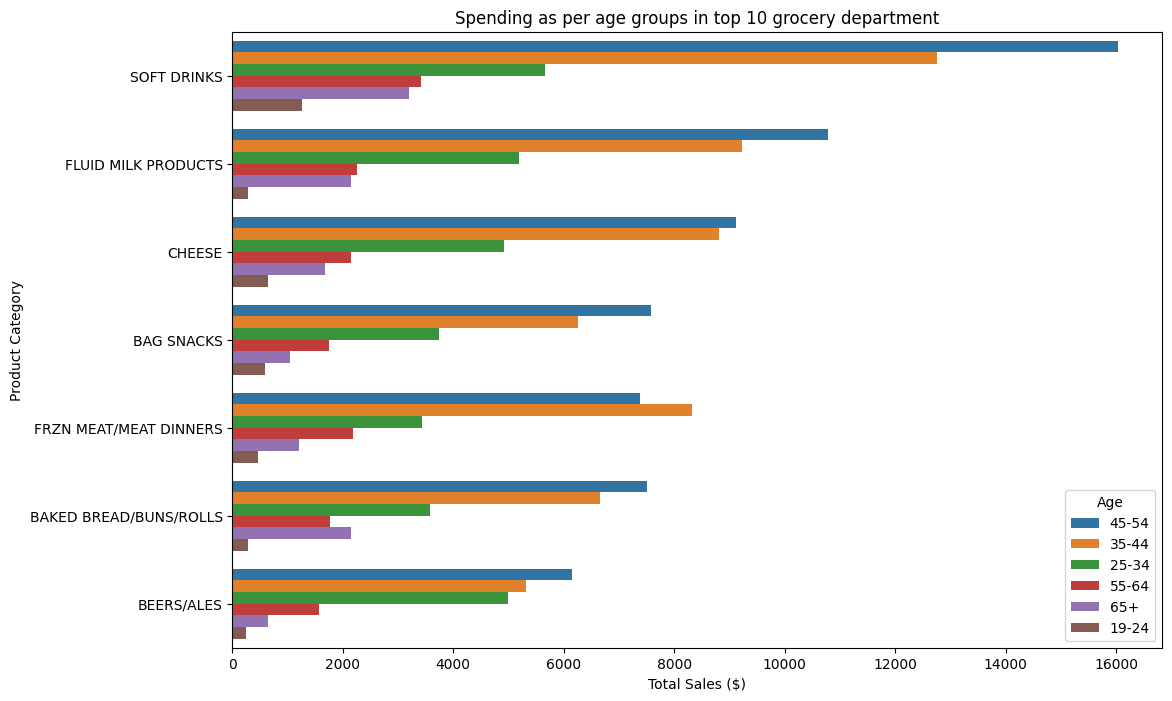

In [4]:
df1 = (
    transactions
    .merge(demographics, how = "inner", on = "household_id")
)

df5 = (
    df1
    .merge(products, how = "inner", on = "product_id")
)

df5 = df5[(df5['department'] == 'GROCERY') & (df5['marital_status'] == 'Married')]

df5 = (
    df5
    .groupby(['product_category', 'age'])
    .agg(Total_sales=('sales_value', 'sum'))
    .reset_index()
    .sort_values(by=['product_category', 'Total_sales'], ascending = [True, False])
)

# Define the desired order of product categories
desired_order = ["SOFT DRINKS", "FLUID MILK PRODUCTS", "CHEESE", "BAG SNACKS", "FRZN MEAT/MEAT DINNERS", "BAKED BREAD/BUNS/ROLLS", "BEERS/ALES"]

# Reorder 'product_category' based on the desired order
df5['product_category'] = pd.Categorical(df5['product_category'], categories=desired_order, ordered=True)

# Group by 'product_category' and calculate total sales
top_grocery = df5.groupby('product_category').agg(Total_sales=('Total_sales', 'sum')).reset_index()

# Select the top 10 product categories
top_grocery = top_grocery.nlargest(10, 'Total_sales')

# Filter df5 for the top 10 product categories
df_top_grocery = df5[df5['product_category'].isin(top_grocery['product_category'])]

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_sales', y='product_category', hue='age', data=df_top_grocery)
plt.title('Spending as per age groups in top 10 grocery department')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')
plt.legend(title='Age')
plt.show()

A prominent and striking revelation emerges from our analysis, as illustrated by the graph above: “SOFT DRINKS” stands out as the unequivocal front runner in sales across all age groups. This finding underscores the broad appeal and consistent demand for Soft Drinks, transcending demographic boundaries.

Identifying Frequently Purchased Products with Soft Drinks by Age Group
In our pursuit of a deeper understanding of customer behaviour, we aim to uncover not only the popularity of Soft Drinks but also the accompanying products frequently bought by customers within specific age groups. To achieve this, we employ a targeted approach by analyzing the data pertaining to the chosen age demographic.
Our methodology entails the following steps:
Data Selection by Age Group: We begin by selecting the specific age group under investigation. This segmentation allows us to focus on a particular subset of customers.
Filtering by Product Category: We filter the master data frame to include only those transactions where the product category is “Soft Drinks.” This step provides us with a list of basket IDs that contain Soft Drinks.
Identifying Frequently Purchased Products: For the basket IDs containing Soft Drinks within the chosen age group, we then proceed to identify the products that are frequently purchased alongside Soft Drinks. This analysis reveals the items most found in shopping baskets along with Soft Drinks for the selected age group.


In [5]:
new_df2 = (
    transactions
    .merge(demographics, how="inner", on="household_id")
    .merge(products, how="inner", on="product_id")
    .query('marital_status == "Married"')
    .groupby(['basket_id', 'product_category', 'transaction_timestamp', 'sales_value', 'age'])
    .agg(sales=('sales_value', 'sum'))
    .reset_index()
    .query('product_category.str.contains("soft drinks", case=False)', engine='python')
)

In [6]:
new_df3 = (
    new_df1
    .merge(new_df2, how="inner", on="basket_id")
    .query('~product_category_x.str.contains("soft drinks", case=False)', engine='python')
    .groupby(['basket_id', 'product_category_x', 'age', 'sales_value'])
    .agg(unique_prod=('product_category_x', lambda x: ', '.join(pd.unique(x).astype(str))))
    .reset_index()
    .groupby(['unique_prod', 'age'])
    .agg(Final_sales=('sales_value', 'sum'))
    .reset_index()
    .sort_values(by='Final_sales', ascending=False)
    .explode('unique_prod')
)

In [7]:
print(new_df3)

                      unique_prod    age  Final_sales
621           FLUID MILK PRODUCTS  45-54      6432.18
74         BAKED BREAD/BUNS/ROLLS  45-54      5620.73
620           FLUID MILK PRODUCTS  35-44      5120.93
68                     BAG SNACKS  45-54      4950.01
73         BAKED BREAD/BUNS/ROLLS  35-44      4465.35
..                            ...    ...          ...
403           COUPONS/STORE & MFG    65+         0.88
592               FLORAL BALLOONS  45-54         0.77
27                        APPAREL  55-64         0.59
416  DELI SPECIALTIES (RETAIL PK)  19-24         0.59
536          ETHNIC PERSONAL CARE  19-24         0.59

[1464 rows x 3 columns]


Analysis for Age Groups: Soft Drinks and Accompanying Products
For the age group spanning from 19 to 24 years to 65+ years, our analysis reveals products, frequently purchased alongside Soft Drinks. To further refine our marketing strategy, we identify the total sales generated by these products when sold in conjunction with Soft Drinks.


Upon analyzing the data, we find the commonly purchased products with Soft Drinks in diverse age groups, that exhibit the highest total sales figures. Our primary objective is to identify product combinations that make marketing sense and can effectively boost sales.
Customer Purchasing Trends Across the Week
To optimize the sales of the selected combo, it is imperative to understand customer purchasing trends throughout the week. Our analysis tries to reveal weekdays when, for different age categories, the sales of the identified combo reach their zenith and dip to their lowest point.
This insight offers a valuable marketing strategy. By strategically promoting our combo on days when sales are typically lower, we can capitalize on this opportunity to boost sales and potentially encourage customers to make purchases they may not have considered otherwise.


In [15]:
##Age group : 19-24

In [8]:
category_sales1 = (
    new_df3
    .query('age == "19-24"')
    .groupby(['unique_prod', 'age'])
    .agg(Total_sales = ('Final_sales', 'sum'))
    .sort_values(by = 'Total_sales', ascending = False)
)

top_5_categories_1 = (
    category_sales1
    .nlargest(5, 'Total_sales')
    .index.get_level_values('unique_prod')
    .tolist()
)

filtered_data_1 = (
    new_df3
    .query('unique_prod in @top_5_categories_1 and age == "19-24"')
    .explode('unique_prod')
    .head(5)
)

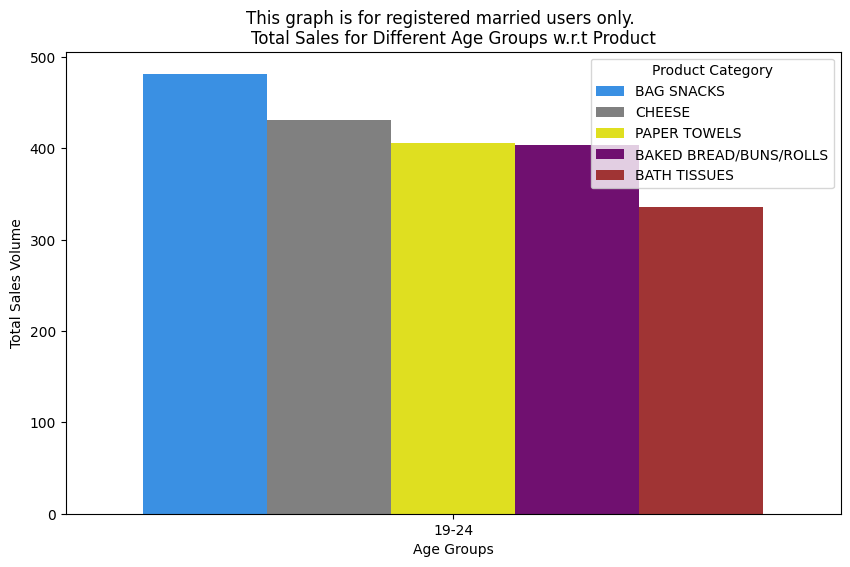

In [9]:
category_colors_1 = {
    "BAG SNACKS": "dodgerblue",
    "CHEESE": "grey",
    "PAPER TOWELS": "yellow",
    "BAKED BREAD/BUNS/ROLLS": "purple",
    "BATH TISSUES": "firebrick"
}

# Create the ggplot visualization with the filtered data
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data_1, x='age', y='Final_sales', hue='unique_prod', dodge=True, palette=category_colors_1)

# Set labels and title
plt.xlabel('Age Groups')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales for Different Age Groups w.r.t Product')
plt.suptitle('This graph is for registered married users only.', y=0.95, fontsize=12)
plt.legend(title='Product Category', loc='upper right')

# Show plot
plt.show()

Day of Week Comparison

In [16]:
prod_1 = (
    transactions
    .merge(demographics, how = "inner", on = "household_id")
    .merge(products, how = "inner", on = "product_id")
    .query('marital_status == "Married" and age == "19-24"')
    .dropna(subset=['product_category'])
    .query('product_category.str.contains("BAG SNACKS|SOFT DRINKS", case = False)', engine = 'python')
    .groupby(['product_category', 'transaction_timestamp', 'age'])
    .agg(sales = ('sales_value', 'sum'))
    .sort_values(by = 'sales', ascending = False)
    .reset_index()
)

prod_1_sales = (
    prod_1
    .assign(DayofWeek=lambda x: x['transaction_timestamp'].dt.day_name())
    .groupby(['DayofWeek', 'product_category'])
    .agg(Total_sales=('sales', 'sum'))
    .sort_values(by=['DayofWeek', 'Total_sales'], ascending=[False, False])
    .reset_index()
)



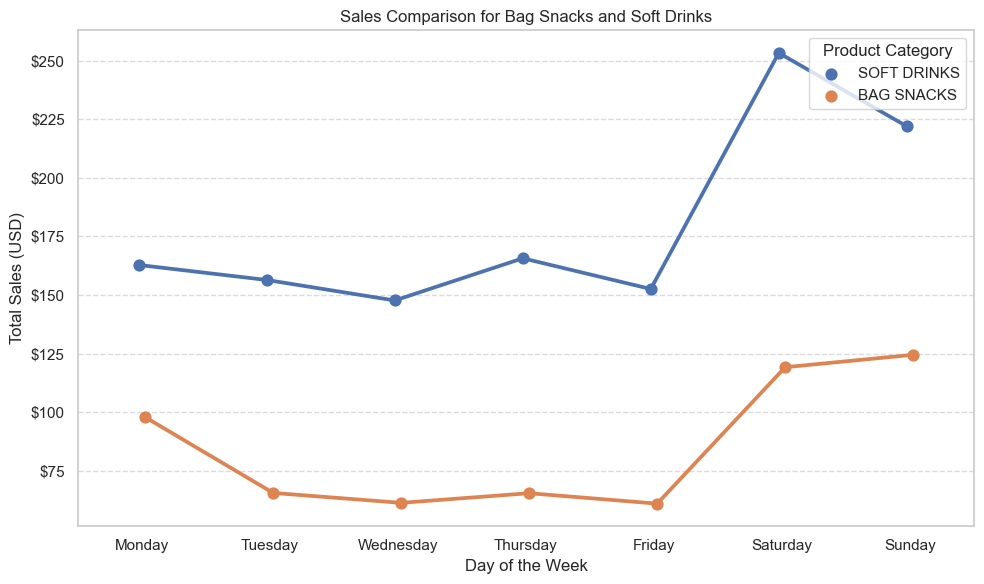

In [29]:
sns.set(style="whitegrid")

# Define the order of days of the week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Use seaborn's pointplot
sns.pointplot(x='DayofWeek', y='Total_sales', hue='product_category', data=prod_1_sales,
              order=days_order, hue_order=prod_1_sales['product_category'].unique(),
              markers='o', linestyles='-', dodge=True, ax=ax)

# Set plot labels and title
ax.set_title("Sales Comparison for Bag Snacks and Soft Drinks")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Sales (USD)")

# Format y-axis labels in dollars
ax.yaxis.set_major_formatter('${:,.0f}'.format)

# Move legend to the right
ax.legend(title='Product Category', loc='upper right')

# Remove y-axis grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In reference to the plot above, it is clear that the highest sales are consistently observed on Saturdays, while the lowest sales occur on Thursdays. This observation underscores the importance of considering these sales trends when planning marketing and promotional activities throughout the week

Age group : 25-34

In [33]:
category_sales2 = (
    new_df3
    .query('age == "25-34"')
    .groupby(['unique_prod', 'age'])
    .agg(Total_sales = ('Final_sales', 'sum'))
    .sort_values(by = 'Total_sales', ascending = False)
)

top_5_categories_2 = (
    category_sales2
    .nlargest(5, 'Total_sales')
    .index.get_level_values('unique_prod')
    .tolist()
)

filtered_data_2 = (
    new_df3
    .query('unique_prod in @top_5_categories_2 and age == "25-34"')
    .explode('unique_prod')
    .head(5)
)

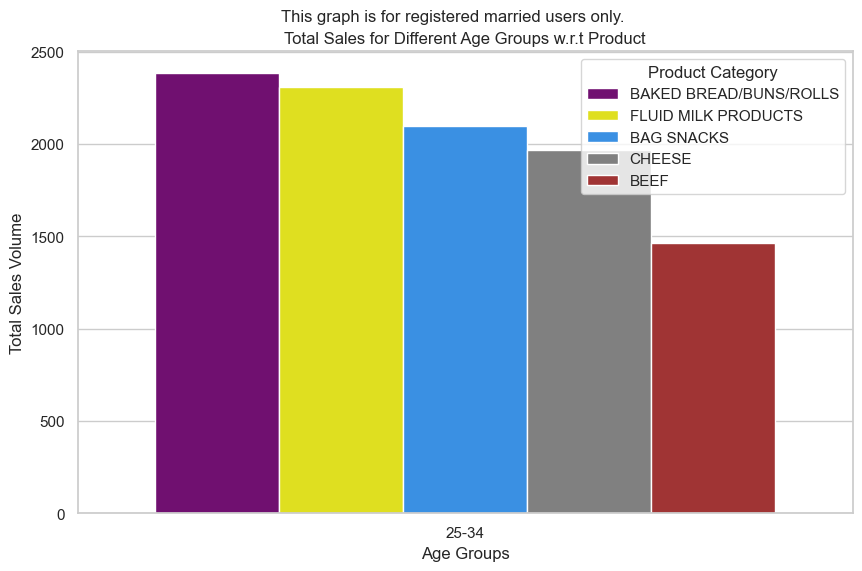

In [34]:
category_colors_2 = {
    "BAG SNACKS": "dodgerblue",
    "CHEESE": "grey",
    "FLUID MILK PRODUCTS": "yellow",
    "BAKED BREAD/BUNS/ROLLS": "purple",
    "BEEF": "firebrick"
}

# Create the ggplot visualization with the filtered data
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data_2, x='age', y='Final_sales', hue='unique_prod', dodge=True, palette=category_colors_2)

# Set labels and title
plt.xlabel('Age Groups')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales for Different Age Groups w.r.t Product')
plt.suptitle('This graph is for registered married users only.', y=0.95, fontsize=12)
plt.legend(title='Product Category', loc='upper right')

# Show plot
plt.show()

Based on the insights extracted from the plot above, it’s apparent that customers in the age bracket of 25 to 34 exhibit a notable pattern of frequent purchases of Baked Breads and Rolls.

Day of Week Comparison

In [36]:
prod_2 = (
    transactions
    .merge(demographics, how = "inner", on = "household_id")
    .merge(products, how = "inner", on = "product_id")
    .query('marital_status == "Married" and age == "25-34"')
    .dropna(subset=['product_category'])
    .query('product_category.str.contains("BAKED BREAD/BUNS/ROLLS|SOFT DRINKS", case = False)', engine = 'python')
    .groupby(['product_category', 'transaction_timestamp', 'age'])
    .agg(sales = ('sales_value', 'sum'))
    .sort_values(by = 'sales', ascending = False)
    .reset_index()
)

prod_2_sales = (
    prod_2
    .assign(DayofWeek=lambda x: x['transaction_timestamp'].dt.day_name())
    .groupby(['DayofWeek', 'product_category'])
    .agg(Total_sales=('sales', 'sum'))
    .sort_values(by=['DayofWeek', 'Total_sales'], ascending=[False, False])
    .reset_index()
)



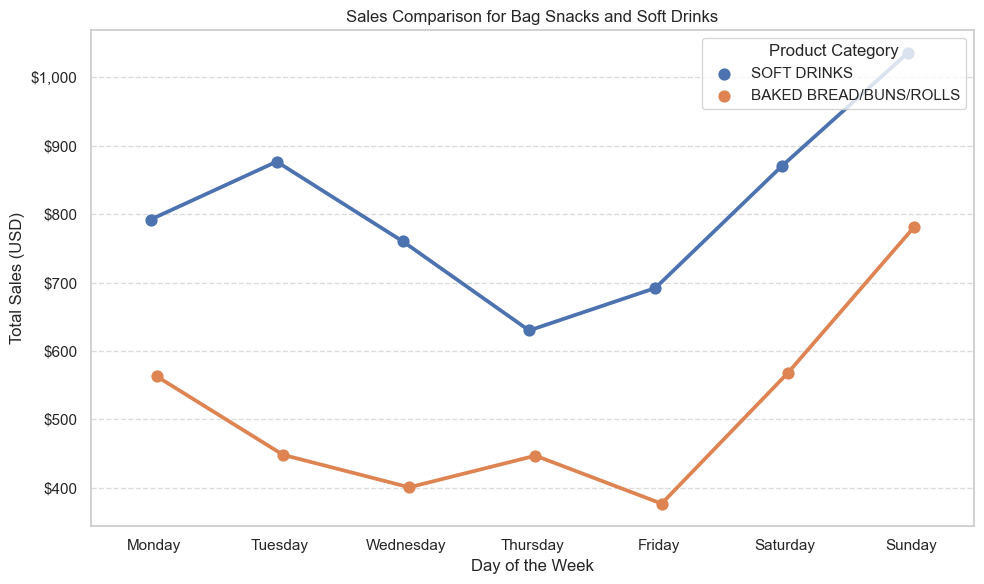

In [38]:
sns.set(style="whitegrid")

# Define the order of days of the week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Use seaborn's pointplot
sns.pointplot(x='DayofWeek', y='Total_sales', hue='product_category', data=prod_2_sales,
              order=days_order, hue_order=prod_2_sales['product_category'].unique(),
              markers='o', linestyles='-', dodge=True, ax=ax)

# Set plot labels and title
ax.set_title("Sales Comparison for Bag Snacks and Soft Drinks")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Sales (USD)")

# Format y-axis labels in dollars
ax.yaxis.set_major_formatter('${:,.0f}'.format)

# Move legend to the right
ax.legend(title='Product Category', loc='upper right')

# Remove y-axis grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In reference to the plot above, it is clear that the highest sales are consistently observed on Sunday, while the lowest sales occur on Thursdays. This observation underscores the importance of considering these sales trends when planning marketing and promotional activities throughout the week